In [188]:
%%capture
#%matplotlib inline
%matplotlib notebook

%load_ext autoreload
%autoreload 2

%reset -f

import os, sys
import numpy as np

import pylab as plt
import matplotlib as mpl
import scipy.io

#plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams.update({"axes.grid" : True})
#plt.rcParams['font.family'] = 'DeJavu Serif'
#plt.rcParams['font.serif'] = ['Times New Roman']

#plt.rcParams.update({'font.size': 14})

# Simulation as a function ot the Kinetic Inductance $L_k$

In [189]:
from dartwarslab.base import file2dic

In [190]:
filename = 'Lk30_t10_w1_s1_d100_eps9.1.h5'
pathname = '/home/giachero/gsbox/kids_rd/DARTWARS/sonnet-sim/IMS-NIST/9.1/sim-results/sim_eps9.1_Lk30/savepath'

#filename = 'Lk29_t10_w1_s1_d100_eps9.1.h5'
#pathname = '/home/giachero/gsbox/kids_rd/DARTWARS/sonnet-sim/IMS-NIST/9.1/sim-results/sim_eps9.1_Lk29/savepath'

In [191]:
d = file2dic(os.path.join(pathname,filename)).read()['l']

In [192]:
l     = np.array(list(map(float ,[l for l in d])))
C0    = np.array([d[l]['C']['C0'] for l in d])
CfitC = np.array([d[l]['C']['p'][0] for l in d])
LfitC = np.array([d[l]['L']['p'][0] for l in d])

L0    = np.array([d[l]['L']['L0'] for l in d])
LfitL = np.array([d[l]['L']['p'][1] for l in d])
CfitL = np.array([d[l]['C']['p'][1] for l in d])


In [193]:
CfitL

array([6.05271014e-11, 6.08080432e-11, 6.08513258e-11, 6.08918209e-11,
       6.09289953e-11, 6.09665104e-11, 6.10105310e-11, 6.10510965e-11,
       6.10899707e-11, 6.11323977e-11, 6.11732432e-11, 6.06160979e-11,
       6.12142376e-11, 6.12552961e-11, 6.12965359e-11, 6.13379331e-11,
       6.13794845e-11, 6.14211505e-11, 6.14607956e-11, 6.15027944e-11,
       6.15438883e-11, 6.15898478e-11, 6.06777291e-11, 6.16323802e-11,
       6.16751049e-11, 6.17180385e-11, 6.17611009e-11, 6.18044257e-11,
       6.18476966e-11, 6.18911778e-11, 6.19319843e-11, 6.19758991e-11,
       6.20230279e-11, 6.07258224e-11, 6.20675502e-11, 6.21123750e-11,
       6.21569413e-11, 6.22016466e-11, 6.22467378e-11, 6.22693779e-11,
       6.07673938e-11])

<IPython.core.display.Javascript object>


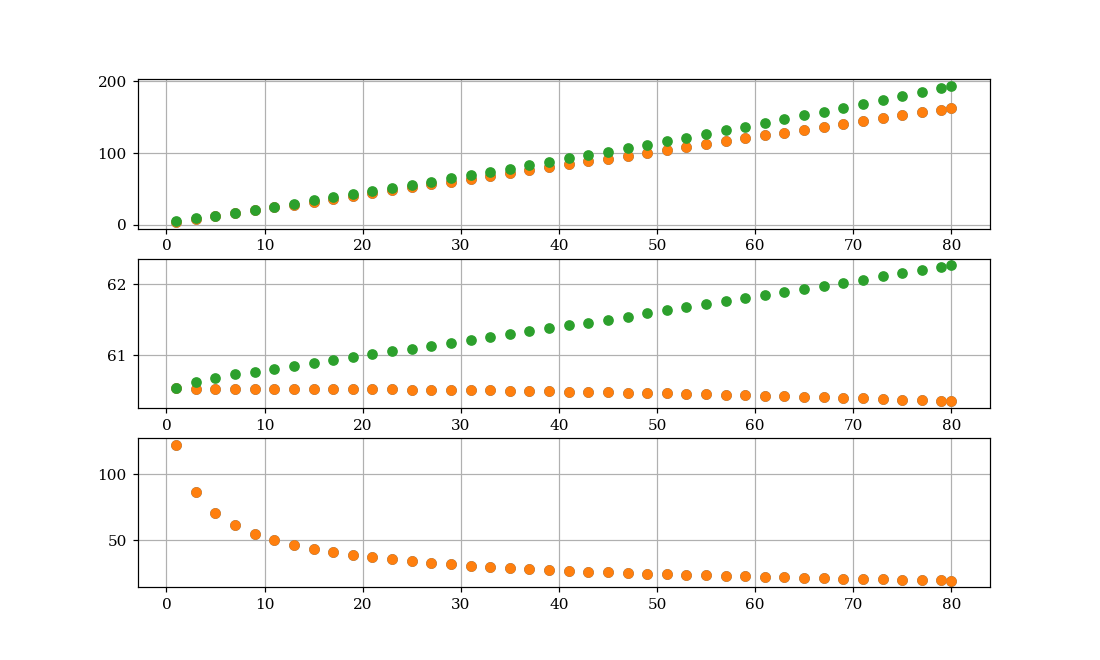

In [194]:
Z0val  = lambda L, C : np.sqrt(L/C)

fig, ax = plt.subplots(3,1)

ax[0].plot(l,C0/1e-15, marker='o', ls='none')
ax[0].plot(l,CfitC/1e-15, marker='o', ls='none')
ax[0].plot(l,LfitC/1e-15, marker='o', ls='none')

ax[1].plot(l,L0/1e-12, marker='o', ls='none')
ax[1].plot(l,LfitL/1e-12, marker='o', ls='none')
ax[1].plot(l,CfitL/1e-12, marker='o', ls='none')

ax[2].plot(l, Z0val(L0, C0), marker='o', ls='none')
ax[2].plot(l, Z0val(L0, CfitC), marker='o', ls='none')

#ax[2].plot(l, Z0val(L0,    CfitC), marker='o', ls='none')
#ax[2].plot(l, Z0val(LfitL, CfitC), marker='o', ls='none')
#ax[2].plot(l, Z0val(CfitL, CfitC), marker='o', ls='none')
#ax[2].plot(l, Z0val(CfitL, LfitC), marker='o', ls='none')





#ax[1].plot(l,LfitL/1e-12, marker='o', ls='none')
#ax[1].plot(l,CfitL/1e-12, marker='o', ls='none')
